## Model Development - Laptop Pricing

### Objectives


- Use Linear Regression in one variable to fit the parameters to a model
- Use Linear Regression in multiple variables to fit the parameters to a model
- Use Polynomial Regression in single variable tofit the parameters to a model
- Create a pipeline for performing linear regression using multiple features in polynomial scaling
- Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

In [6]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.2 MB 1.8 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.2 MB 2.5 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.2 MB 2.6 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.2 MB 2.4 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.2 MB 2.6 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.2 MB 2.7 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.2 MB 2.7 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.2 MB 2.6 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.2 MB 2.6 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.2 MB 2.3 MB/s eta 0:00:03
   -----------------

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [8]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [9]:
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0,Unnamed: 0.1,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


#### Single Linear Regression

In [12]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)


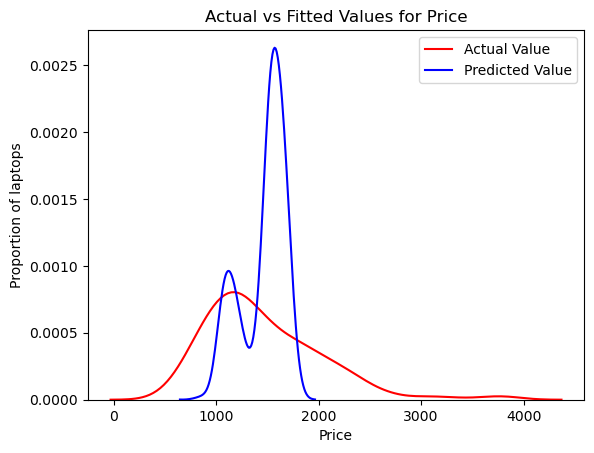

In [13]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [15]:
#R-squared
lm.fit(X,Y)
print('the R-squared value is:', lm.score(X,Y))

the R-squared value is: 0.1344436321024326


In [19]:
#MSE
Yhat = lm.predict(X)
print('the mean squared error is:', mean_squared_error(df['Price'],Yhat))

the mean squared error is: 284583.4405868629


#### Multiple Linear Regression

In [24]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

Text(0, 0.5, 'Proportion of laptops')

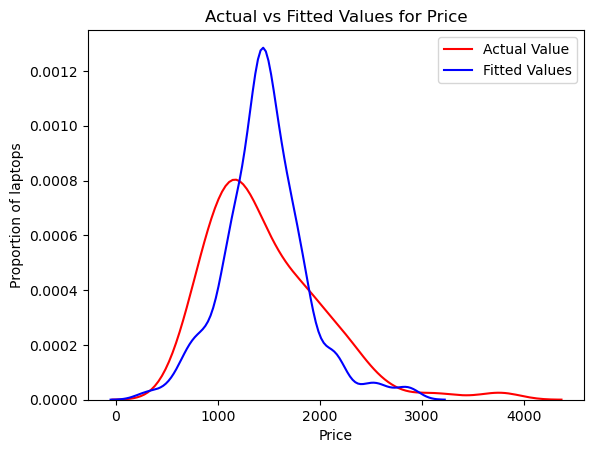

In [25]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [26]:
#R-squared
lm.fit(Z,Y)
print('the R-squared value is:', lm.score(Z,Y))

the R-squared value is: 0.5082509055187372


In [27]:
Yhat = lm.predict(Z)
print('the mean squared error is:', mean_squared_error(Y,Yhat))

the mean squared error is: 161680.57263893113


#### Polynomial Regression

In [32]:
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

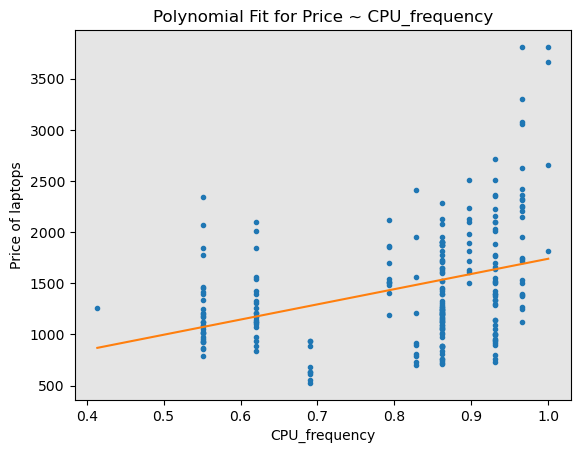

In [34]:
PlotPolly(p1, X, Y, 'CPU_frequency')

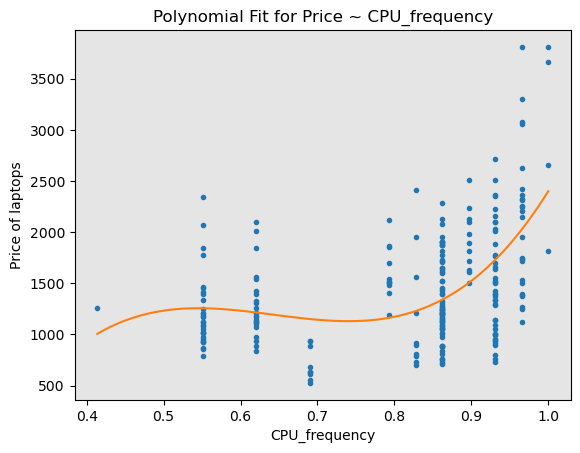

In [35]:
PlotPolly(p3, X, Y, 'CPU_frequency')

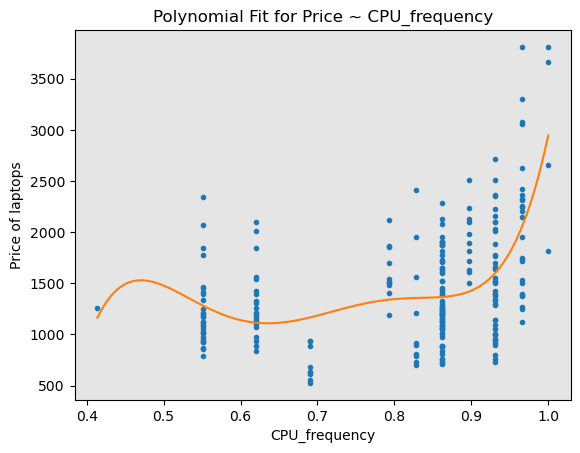

In [36]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [38]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796530986
The MSE value for 3rd degree polynomial is:  241024.8630384881
The R-square value for 5th degree polynomial is:  0.3030822706444306
The MSE value for 5th degree polynomial is:  229137.29548052172


- As you increase the degree of the polynomial, both the R² score increases and the MSE decreases, which means the model fits the data better.

- However, these are still relatively low R² scores, suggesting that CPU_frequency alone isn't enough to explain most of the variance in your target variable.

#### Pipeline

In [39]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [40]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.8612802837
R^2 for multi-variable polynomial pipeline is:  0.6332094535859659


- Much better performance! This model explains about 63.3% of the variance in the target variable.
- The MSE is significantly lower, which means predictions are closer to actual values.